In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('GDP_change.csv')
df.head()

,Year,GDP
0,1962,-0.791615
1,1963,3.063226
2,1964,1.458597
3,1965,-10.088720
4,1966,2.580441


In [4]:
df.tail()

,Year,GDP
52,2014,1.024121
53,2015,0.586026
54,2016,0.173273
55,2017,-1.001638
56,2018,-0.356520


In [8]:
date = pd.date_range(start='1/1/1962', end='1/1/2019', freq='Y')
date.shape

(57,)

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

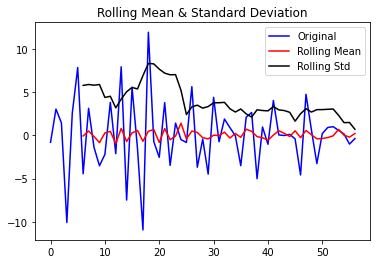

Results of Dickey-Fuller Test:
Test Statistic                 -4.893996
p-value                         0.000036
#Lags Used                      9.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64 



In [22]:
test_stationarity(df['GDP'])

In [23]:
import statsmodels.api as sm

In [24]:

mod = sm.tsa.statespace.SARIMAX(df['GDP'].values,
                                order=(2,0,3),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -127.327
Date:                Sun, 09 Aug 2020   AIC                            266.655
Time:                        23:26:25   BIC                            278.476
Sample:                             0   HQIC                           271.201
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5124      0.255     -2.008      0.045      -1.013      -0.012
ar.L2         -0.5553      0.188     -2.946      0.003      -0.925      -0.186
ma.L1         -0.7359      0.324     -2.273      0.0

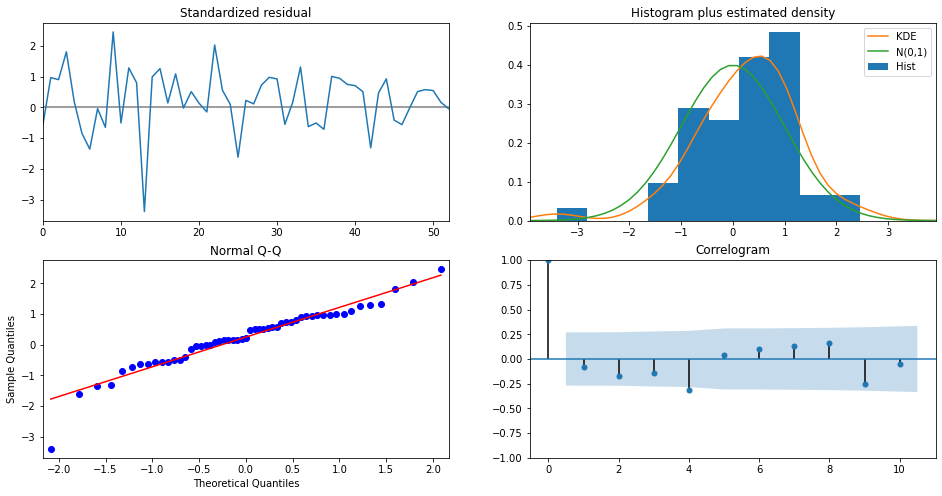

In [25]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

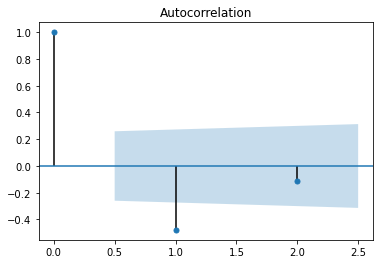

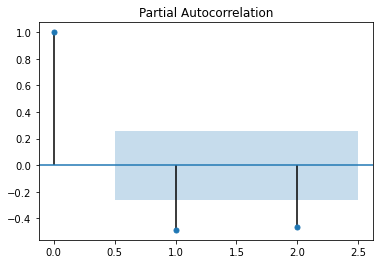

In [39]:

plot_acf(df['GDP'],lags=2)
plot_pacf(df['GDP'],lags=2);